In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [3]:
!pip install -q imblearn


You should consider upgrading via the 'C:\Program Files\Python\python.exe -m pip install --upgrade pip' command.


In [4]:
conn = pd.read_csv(r"C:\Users\admin\Desktop\customer_churn.csv")
conn.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
# selecting the necessary columns from the dataframe
tel_data = conn[["Complains", "Charge Amount", "Seconds of Use", "Frequency of use", "Frequency of SMS", "Age Group", "Customer Value","Churn"]]
tel_data.head()

,Complains,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Age Group,Customer Value,Churn
0,0,0,4370,71,5,3,197.640,0
1,0,0,318,5,7,2,46.035,0
2,0,0,2453,60,359,3,1536.520,0
3,0,0,4198,66,1,1,240.020,0
4,0,0,2393,58,2,1,145.805,0


In [6]:
tel_data[["Seconds of Use", "Frequency of use", "Frequency of SMS", "Customer Value"]].describe()

,Seconds of Use,Frequency of use,Frequency of SMS,Customer Value
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,4472.459683,69.460635,73.174921,470.972916
std,4197.908687,57.413308,112.237560,517.015433
min,0.000000,0.000000,0.000000,0.000000
25%,1391.250000,27.000000,6.000000,113.801250
50%,2990.000000,54.000000,21.000000,228.480000
75%,6478.250000,95.000000,87.000000,788.388750
max,17090.000000,255.000000,522.000000,2165.280000


In [7]:
zero_data = tel_data[tel_data['Seconds of Use'] == 0]
zero_data

,Complains,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Age Group,Customer Value,Churn
18,0,0,0,0,0,2,0.0,1
118,0,0,0,0,0,2,0.0,1
128,1,0,0,0,0,3,0.0,1
132,0,0,0,0,0,5,0.0,0
201,0,0,0,0,0,2,0.0,0
...,...,...,...,...,...,...,...,...
2868,0,0,0,0,0,2,0.0,1
3001,0,0,0,0,0,3,0.0,0
3018,0,0,0,0,0,2,0.0,1
3028,0,0,0,0,0,3,0.0,1


In [8]:
assert \
tel_data[tel_data['Seconds of Use'] == 0].shape[0] == \
tel_data[tel_data['Frequency of use'] == 0].shape[0]

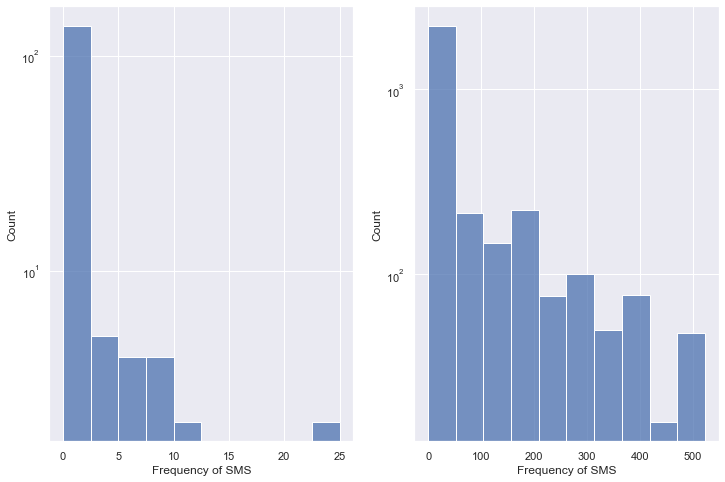

In [9]:
#to see if the 0 value in datasets had any significane(plot of frequency of sms when frequency 0f use==seconds of use==0 vs the whole dataset)
sns.set()
fig,ax = plt.subplots(1, 2, figsize=(12,8))
sns.histplot(x='Frequency of SMS', data=zero_data, ax=ax[0], bins=10)
sns.histplot(x='Frequency of SMS', data=tel_data, ax=ax[1], bins=10)
ax[0].set(yscale='log')
ax[1].set(yscale='log')
plt.show()

In [10]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Complains         3150 non-null   int64  
 1   Charge Amount     3150 non-null   int64  
 2   Seconds of Use    3150 non-null   int64  
 3   Frequency of use  3150 non-null   int64  
 4   Frequency of SMS  3150 non-null   int64  
 5   Age Group         3150 non-null   int64  
 6   Customer Value    3150 non-null   float64
 7   Churn             3150 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 197.0 KB


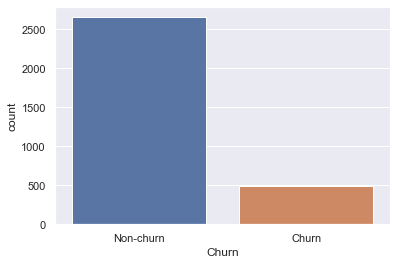

In [11]:

sns.countplot(x='Churn', data=tel_data)
plt.xticks([0, 1], ['Non-churn', 'Churn'])
plt.show()

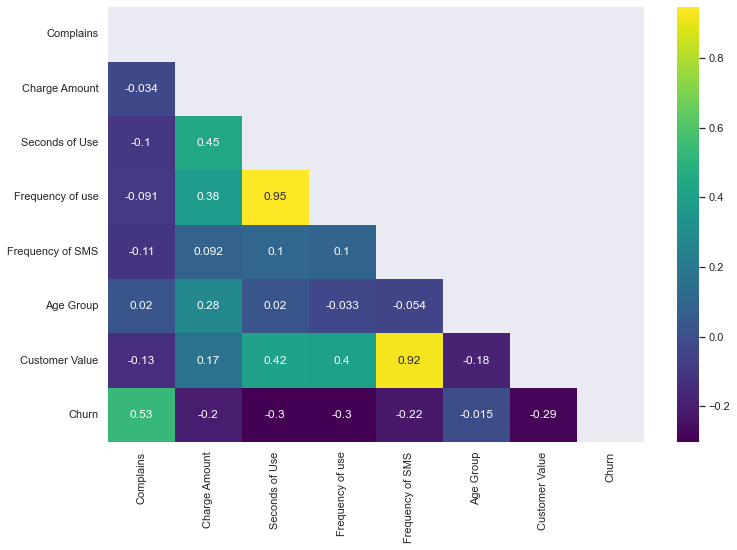

In [12]:
import numpy as np
plt.figure(figsize=(12,8))
corr = tel_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.show()

In [13]:
tel_data_selected = tel_data.drop('Frequency of use', axis=1)

tel_data_selected.head()

,Complains,Charge Amount,Seconds of Use,Frequency of SMS,Age Group,Customer Value,Churn
0,0,0,4370,5,3,197.640,0
1,0,0,318,7,2,46.035,0
2,0,0,2453,359,3,1536.520,0
3,0,0,4198,1,1,240.020,0
4,0,0,2393,2,1,145.805,0


In [14]:
churned = tel_data_selected[tel_data_selected['Churn']==1]
not_churned = tel_data_selected[tel_data_selected['Churn']==0]

print('percentage of churned customer: {}'.format(churned.shape[0]/tel_data_selected.shape[0]))
print('percentage of not-churned customer: {}'.format(not_churned.shape[0]/tel_data_selected.shape[0]))

percentage of churned customer: 0.15714285714285714
percentage of not-churned customer: 0.8428571428571429


In [15]:
#Dealing with imbalance in the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [16]:
#using SMOTE to resample
# splitting the data as X and y
X = tel_data_selected.drop('Churn', axis=1)
y = tel_data_selected['Churn']

# making a SMOTE object
resampler = SMOTE(random_state=5)

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# resampling the data
X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

In [17]:
# verifying the resampled data
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 2124, 1: 2124})


In [18]:
#scaling(normalizing the values) the column containing numerical values(rest are encoded categorical)
# making a ColumnTransformer object
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('scaler', StandardScaler(), ['Seconds of Use', 'Frequency of SMS', 'Customer Value'])], remainder='passthrough')

X_scaled = ct.fit_transform(X_resampled)

In [19]:
X_test_scaled = ct.transform(X_test)

In [20]:
# making an object for LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_scaled, y_resampled)

LogisticRegression()

In [21]:
y_pred = log_reg.predict(X_test_scaled)

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       531
           1       0.36      0.87      0.51        99

    accuracy                           0.73       630
   macro avg       0.66      0.79      0.66       630
weighted avg       0.87      0.73      0.77       630



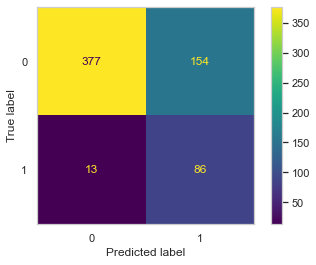

In [23]:
# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [24]:
# the data directly scaled without resampling
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

log_reg.fit(X_train_scaled, y_train)
y_pred2 = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       531
           1       0.88      0.37      0.52        99

    accuracy                           0.89       630
   macro avg       0.89      0.68      0.73       630
weighted avg       0.89      0.89      0.87       630



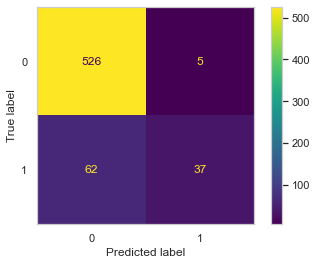

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()